In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from itertools import combinations

%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [2]:
df = pd.read_csv("car_data.csv")
df.head(1)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1


#### Tasks, Part 1.1

In [3]:
regr_mp = linear_model.LinearRegression()
mileage = df[['Mileage']]
price = df['Price']
regr_mp.fit(mileage, price)
print('{} * Price + {:.2f}'.format(regr_mp.coef_[0], regr_mp.intercept_))

-0.17252050279124917 * Price + 24764.56


#### Tasks, Part 1.2

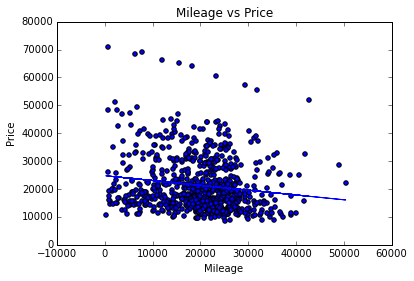

In [4]:
plt.scatter(x=mileage, y=price)
plt.plot(mileage, regr_mp.predict(mileage))
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

#### Tasks, Part 1.3

In [5]:
print('Score of linear regression: {:.5f}'
      .format(regr_mp.score(mileage, price)))

Score of linear regression: 0.02046


The score is nowhere near 0.8; this is not a good fit for our data.

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

In [6]:
df.head(1)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1


In [7]:
car_features = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']


In [8]:
def lin_reg_eq(cols, df_in, focus='Price', print_this=False):
    input_cols = df_in[cols]
    focus_output = df_in[focus]
    regr = linear_model.LinearRegression()
    regr.fit(input_cols, focus_output)
    if print_this:
        print('The equation for columns {} w.r.t. {}:\n'.format(cols, focus))
        for n, x in enumerate(cols):
            print('({} * {}) + '.format(regr.coef_[n], x))
        print('{}'.format(regr.intercept_))
    return regr

#### Tasks, Part 2.1

In [9]:
regr_features = lin_reg_eq(car_features, df, print_this=True)

The equation for columns ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] w.r.t. Price:

(-0.16974783233303684 * Mileage) + 
(3792.378930782511 * Cylinder) + 
(-787.2207316338249 * Liter) + 
(-1542.7458463820649 * Doors) + 
(6288.997149849927 * Cruise) + 
(-1993.7952756984305 * Sound) + 
(3349.361619613561 * Leather) + 
6758.755143598093


#### Tasks, Part 2.2

In [10]:
print('Score of the above linear regression: {}'
      .format(regr_features.score(df[car_features], df['Price'])))

Score of the above linear regression: 0.446264353672838


In [11]:
def lin_reg_wrt_focus(cols, df_in, focus='Price'):
    input_cols = df_in[cols]
    focus_output = df_in[focus]
    regr = linear_model.LinearRegression()
    regr.fit(input_cols, focus_output)
    return regr.score(input_cols, focus_output)

def get_combos(cols):
    return [list(combinations(cols, n + 1)) for n in range(len(cols))]

def all_combo_scores(combos, df_in, focus='Price'):
    combo_scores = {}
    for m in range(len(combos)):
        for n in combos[m]:
            combo_scores[n] = lin_reg_wrt_focus(list(n), df_in, focus)
    return combo_scores

#### Tasks, Part 2.3

In [12]:
combos = get_combos(car_features)
combo_scores = all_combo_scores(combos, df)
score_list1 = sorted(combo_scores.items(), key=lambda c: c[1], reverse=True)
for score in score_list1:
    print(score[1], score[0])

0.446264353673 ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')
0.445690921059 ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')
0.437805741537 ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather')
0.436940215124 ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather')
0.430141484065 ('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather')
0.430018204833 ('Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather')
0.426534863781 ('Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')
0.425768132797 ('Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')
0.424828404543 ('Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')
0.42441824018 ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound')
0.424097482585 ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound')
0.42253076704 ('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Leather')
0.422507421477 ('Mileage', 'Cylinder', 'Cruise', 'Leather')
0.41965804777 ('Mileage', 'Cylinder', 'Liter', 'Doors

#### Tasks, Part 2.3 Conclusion

There is no combination that produces a strong correlation. However, the **`Cylinder`** field has a high score on its own: 0.32385903759512258.

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [13]:
combos2 = get_combos(car_features)
combo_scores2 = all_combo_scores(combos2, df[df['Model'] == 'AVEO'])
score_list2 = sorted(combo_scores2.items(), key=lambda c: c[1], reverse=True)
for score in score_list2:
    print(score[1], score[0])

0.396143331952 ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')
0.396143331952 ('Mileage', 'Liter', 'Cruise', 'Sound', 'Leather')
0.396143331952 ('Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather')
0.396143331952 ('Mileage', 'Cruise', 'Sound', 'Leather')
0.396143331952 ('Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')
0.396143331952 ('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather')
0.396143331952 ('Mileage', 'Doors', 'Cruise', 'Sound', 'Leather')
0.396143331952 ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')
0.386857833257 ('Mileage', 'Liter', 'Sound', 'Leather')
0.386857833257 ('Mileage', 'Sound', 'Leather')
0.386857833257 ('Mileage', 'Liter', 'Doors', 'Sound', 'Leather')
0.386857833257 ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Sound', 'Leather')
0.386857833257 ('Mileage', 'Cylinder', 'Doors', 'Sound', 'Leather')
0.386857833257 ('Mileage', 'Cylinder', 'Liter', 'Sound', 'Leather')
0.386857833257 ('Mileage', 'Doors', 'Sound'

In [14]:
df_mmt = df.copy()

df_make = pd.get_dummies(df['Make'])
df_mmt[list(df_make.columns)] = df_make
df_mmt.pop('Make')

df_model = pd.get_dummies(df['Model'])
df_mmt[list(df_model.columns)] = df_model
df_mmt.pop('Model')

df_type = pd.get_dummies(df['Type'])
df_mmt[list(df_type.columns)] = df_type
df_mmt.pop('Type')

pd.set_option('display.max_columns', None)
df_mmt.head(1)

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevrolet,Pontiac,SAAB,Saturn,9-2X AWD,9_3,9_3 HO,9_5,9_5 HO,AVEO,Bonneville,CST-V,CTS,Cavalier,Century,Classic,Cobalt,Corvette,Deville,G6,GTO,Grand Am,Grand Prix,Impala,Ion,L Series,Lacrosse,Lesabre,Malibu,Monte Carlo,Park Avenue,STS-V6,STS-V8,Sunfire,Vibe,XLR-V8,Convertible,Coupe,Hatchback,Sedan,Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


We'll still look at car_features and price, but data frame is bigger.

In [36]:
columns = list(df_make.columns)
columns.extend(df_model.columns)
columns.extend(df_type.columns)
input_cols = []
for item in columns:
    input_cols.append([item])

In [38]:
# combo_twos = list(combinations(car_features, 2))
car_data = {}
for item in input_cols:
    item.extend(['Mileage', 'Cylinder'])
    car_data[item[0]] = lin_reg_wrt_focus(item, df_mmt)

score_list2 = sorted(car_data.items(), key=lambda c: c[1], reverse=True)
for score in score_list2:
    print(score[1], score[0])

0.695232618809 SAAB
0.568121299073 Convertible
0.513646573061 Cadillac
0.465491428861 XLR-V8
0.454172870559 9_3 HO
0.443404983387 Chevrolet
0.419931892199 9_5
0.385899305417 9_3
0.384781331968 Pontiac
0.384125404628 Malibu
0.383246130313 Wagon
0.380153896568 9_5 HO
0.371739029404 Hatchback
0.366155000165 AVEO
0.361478650665 STS-V6
0.361375047993 CST-V
0.36069237115 Coupe
0.359811012447 Sedan
0.355214379733 Grand Prix
0.355068424796 Bonneville
0.354559921432 STS-V8
0.35320022497 Buick
0.352468506337 Corvette
0.350453562667 Saturn
0.349861613377 Cavalier
0.349156551284 Century
0.348597723248 L Series
0.348566781285 Grand Am
0.347637611508 Monte Carlo
0.347132473242 Impala
0.346880944097 Deville
0.345508003258 G6
0.344901633137 Lesabre
0.34461279024 Ion
0.344001016336 CTS
0.34388152478 Cobalt
0.343420755481 Lacrosse
0.343399589777 9-2X AWD
0.341374156159 Sunfire
0.341071380668 GTO
0.340632029199 Classic
0.339879245132 Vibe
0.339864515127 Park Avenue
